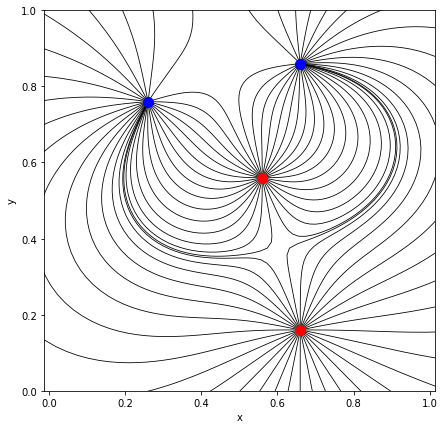

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.offline as py
from scipy.integrate import ode as ode
py.init_notebook_mode(connected=True)



class charge:
    def __init__(self, q, pos):
        self.q = q
        self.pos = pos
        
def E_point_charge(q, a, x, y):
    return q*(x-a[0])/((x-a[0])**2+(y-a[1])**2)**(1.5), \
        q*(y-a[1])/((x-a[0])**2+(y-a[1])**2)**(1.5)
 
def E_total(x, y, charges):
    Ex, Ey = 0, 0
    for C in charges:
        E  = E_point_charge(C.q, C.pos, x, y)
        Ex = Ex+E[0]
        Ey = Ey+E[1]
    return [ Ex, Ey ]

def E_dir(t, y, charges):
    Ex, Ey = E_total(y[0], y[1], charges)
    n = np.sqrt(Ex**2+Ey*Ey)
    return [Ex/n, Ey/n]



# charges and positions
charges = [charge( 1, [0.56, 0.56]),
           charge(-1, [0.26, 0.76]),
           charge( 1, [0.66, 0.16]),
           charge(-1, [0.66, 0.86]) ]

# calculate field lines
R = 0.01
# loop over all charges
xs, ys = [], []
for C in charges:
    # plot field lines starting in current charge
    dt = 0.8*R
    if C.q < 0:
        # because the electric field lines start only from positive charge,
        # skip the process when the current charges is negative.
        continue
    # loop over field lines starting in different directions 
    # around current charge
    for alpha in np.linspace(0, 2*np.pi*31/32, 32):
        r = ode(E_dir)
        r.set_integrator('vode')
        r.set_f_params(charges)
        x = [ C.pos[0] + np.cos(alpha)*R ]
        y = [ C.pos[1] + np.sin(alpha)*R ]
        r.set_initial_value([x[0], y[0]], 0)
        cnt = 0
        while r.successful():
            Enorm = E_total(r.y[0],r.y[1],charges)
            Enorm = (Enorm[0]**2 + Enorm[1]**2)**0.5
            a = 5
            dt = R*a*Enorm**(-0.4)
            #if cnt % 1000 == 0:
            #    print(r.y[0],r.y[1],Enorm,dt2)
            #cnt += 1
            r.integrate(r.t+dt)
            x.append(r.y[0])
            y.append(r.y[1])
            hit_charge=False
            # check if field line ends in some charge
            for C2 in charges:
                if np.sqrt((r.y[0]-C2.pos[0])**2+(r.y[1]-C2.pos[1])**2)<R:
                    hit_charge = True
            if hit_charge:
                break
        xs.append(x)
        ys.append(y)
        
        
        
fig = plt.figure(figsize=(7, 7),facecolor="w")
ax = fig.add_subplot(111)

# plot field line
for x, y in zip(xs,ys):
    ax.plot(x, y, color="k",lw=0.8)

# plot point charges
for C in charges:
    if C.q>0:
        ax.plot(C.pos[0], C.pos[1], 'ro', ms=10*np.sqrt(C.q))
    if C.q<0:
        ax.plot(C.pos[0], C.pos[1], 'bo', ms=10*np.sqrt(-C.q))


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal','datalim')
plt.savefig('electric_field_lines_pyplot_wo_mayavi.png',
            dpi=250,bbox_inches="tight",pad_inches=0.02)
plt.show()
    
    
    
    
    
    
    
py.iplot_mpl(fig)    
        